NAME : BAYU IZZAH SALAM

EMAIL ADDRESS : bayuizzahsalam@gmail.com

COURSE : BELAJAR MACHINE LEARNING UNTUK PEMULA

In [1]:
#download dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-26 04:43:22--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  8.88MB/s    in 53s     

2021-07-26 04:44:16 (5.81 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
#unzip dataset
import zipfile
import os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [3]:
#checking folder of data
os.listdir('rps/rockpaperscissors')

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [4]:
#create directory name
base_dir = 'rps/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [5]:
os.mkdir(train_dir)
os.mkdir(val_dir)

In [6]:
#create directory for data train
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

#create directory for data validation
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

In [7]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [8]:
#data train and validation split
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4)

In [9]:
#copy file
import shutil

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(train_scissors, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(train_paper, file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock, file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir, file), os.path.join(val_scissors, file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir, file), os.path.join(val_paper, file))

In [12]:
#image augmentation
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator (
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest' 
)

In [13]:
#using object IDG for data train
train_gen = train_datagen.flow_from_directory (
    train_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode='categorical'
)

val_gen = val_datagen.flow_from_directory (
    val_dir,
    target_size = (150, 150),
    batch_size = 5,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [14]:
#create CNN architerture
model = tf.keras.models.Sequential ([
          tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)), 
          tf.keras.layers.MaxPooling2D(2, 2),
          tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),
          tf.keras.layers.Flatten(), 
          tf.keras.layers.Dense(512, activation='relu'), 
          tf.keras.layers.Dense(3, activation='softmax') 
])

In [15]:
#compile model
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy']
              ) 

In [17]:
#model training
model.fit(
    train_gen,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_gen,
    validation_steps = 5, 
    verbose = 2
)

Epoch 1/20
25/25 - 7s - loss: 0.2502 - accuracy: 0.8800 - val_loss: 0.3923 - val_accuracy: 0.8800
Epoch 2/20
25/25 - 7s - loss: 0.3317 - accuracy: 0.8720 - val_loss: 0.2815 - val_accuracy: 0.9200
Epoch 3/20
25/25 - 7s - loss: 0.2028 - accuracy: 0.9360 - val_loss: 0.1165 - val_accuracy: 1.0000
Epoch 4/20
25/25 - 7s - loss: 0.1316 - accuracy: 0.9520 - val_loss: 0.2553 - val_accuracy: 0.9200
Epoch 5/20
25/25 - 7s - loss: 0.1459 - accuracy: 0.9440 - val_loss: 0.0416 - val_accuracy: 1.0000
Epoch 6/20
25/25 - 7s - loss: 0.2229 - accuracy: 0.9520 - val_loss: 0.2592 - val_accuracy: 0.9200
Epoch 7/20
25/25 - 7s - loss: 0.1955 - accuracy: 0.9280 - val_loss: 0.0542 - val_accuracy: 1.0000
Epoch 8/20
25/25 - 7s - loss: 0.1261 - accuracy: 0.9600 - val_loss: 0.3726 - val_accuracy: 0.8800
Epoch 9/20
25/25 - 7s - loss: 0.1320 - accuracy: 0.9520 - val_loss: 0.2260 - val_accuracy: 0.8800
Epoch 10/20
25/25 - 7s - loss: 0.1558 - accuracy: 0.9600 - val_loss: 0.0870 - val_accuracy: 0.9600
Epoch 11/20
25/25 -

In [19]:
#model accuration training
score_acc = model.evaluate(train_gen)
print('Loss : {:.4f}'.format(score_acc[0]))
print('Accuration : {:.4f}'.format(score_acc[1]))

263/263 [==============================] - 24s 91ms/step - loss: 0.1731 - accuracy: 0.9405
Loss : 0.1731
Accuration : 0.9405


In [18]:
#model accuration Testing
score_acc = model.evaluate(val_gen)
print('Loss : {:.4f}'.format(score_acc[0]))
print('Accuration : {:.4f}'.format(score_acc[1]))

176/176 [==============================] - 16s 91ms/step - loss: 0.1536 - accuracy: 0.9521
Loss : 0.1536
Accuration : 0.9521


Saving images.jpg to images.jpg
images.jpg
scissors


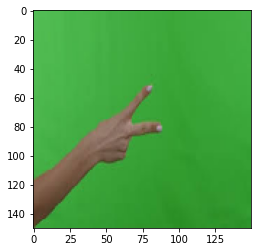

In [20]:
#testing models
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#create files upload
upload_files = files.upload()

for fn in upload_files.keys():
  #predict images
  path = fn
  images = image.load_img(path, target_size=(150,150))
  image_plot = plt.imshow(images)
  x = image.img_to_array(images)
  x = np.expand_dims(x, axis = 0)

  image = np.vstack([x])
  classes = model.predict(image, batch_size=10)

  print(fn)
  if classes[0][0]==1:
    print("paper")
  elif classes[0][1]==1:
    print("rock")
  else:
    print("scissors")
